In [2]:
import os
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter
from matplotlib.lines import Line2D
import seaborn as sns
sns.set_theme()

from source.constants import PLOTS_PATH

os.makedirs(PLOTS_PATH, exist_ok=True)

In [3]:
# data taken from analyze_face_detection_calibration.ipynb
ff_ece_means = [0.154, 0.069, 0.091]
ff_ece_stds = [0.019, 0.003, 0.024]
ff_m_ece_means = [0.070, 0.026, 0.046]
ff_m_ece_stds = [0.004, 0.002, 0.006]
ff_labels = ["age", "gender", "race"]

utk_ece_means = [0.181, 0.061, 0.136]
utk_ece_stds = [0.012, 0.002, 0.023]
utk_m_ece_means = [0.122, 0.033, 0.102]
utk_m_ece_stds = [0.004, 0.001, 0.006]
utk_labels = ["age", "gender", "race"]

cx_ece_means = [0.012]
cx_ece_stds = [0.003]
cx_m_ece_means = [0.011]
cx_m_ece_stds = [0.001]
cx_labels = ["n.f."]

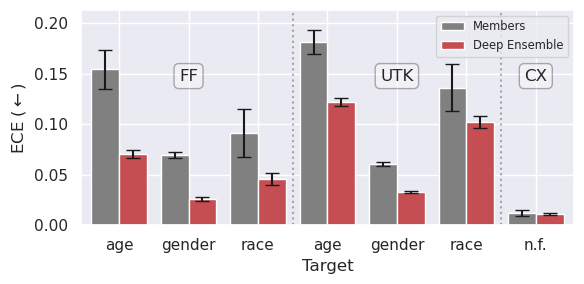

In [4]:
c_member = "gray"
c_ens = "C3"

plt.figure(figsize=(6, 3))

min_length = 0
plt.bar([x - 0.2 for x in range(min_length, len(ff_ece_means))], 
        ff_ece_means, yerr=ff_ece_stds, color=c_member, label="Members", capsize=5, width=0.4)
plt.bar([x + 0.2 for x in range(min_length, len(ff_m_ece_means))], 
        ff_m_ece_means, yerr=ff_m_ece_stds, color=c_ens, label="Deep Ensemble", capsize=5, width=0.4)
min_length = len(ff_ece_means)
plt.bar([x - 0.2 for x in range(min_length, min_length + len(utk_ece_means))], 
        utk_ece_means, yerr=utk_ece_stds, color=c_member, capsize=5, width=0.4)
plt.bar([x + 0.2 for x in range(min_length, min_length + len(utk_m_ece_means))],
        utk_m_ece_means, yerr=utk_m_ece_stds, color=c_ens, capsize=5, width=0.4)
min_length += len(utk_ece_means)
plt.bar([x - 0.2 for x in range(min_length, min_length + len(cx_ece_means))], 
        cx_ece_means, yerr=cx_ece_stds, color=c_member, capsize=5, width=0.4)
plt.bar([x + 0.2 for x in range(min_length, min_length + len(cx_m_ece_means))],
        cx_m_ece_means, yerr=cx_m_ece_stds, color=c_ens, capsize=5, width=0.4)
plt.xticks(range(len(ff_ece_means) + len(utk_ece_means) + len(cx_ece_means)),
              ff_labels + utk_labels + cx_labels, rotation=0)
plt.text(1, 0.143, "FF", fontsize="medium", ha="center", bbox=dict(boxstyle='round, pad=0.3', edgecolor='black', facecolor='white', alpha=0.3))
plt.text(4, 0.143, "UTK", fontsize="medium", ha="center", bbox=dict(boxstyle='round, pad=0.3', edgecolor='black', facecolor='white', alpha=0.3))
plt.text(6, 0.143, "CX", fontsize="medium", ha="center", bbox=dict(boxstyle='round, pad=0.3', edgecolor='black', facecolor='white', alpha=0.3))
ymax = plt.gca().get_ylim()[1] * 1.05
plt.vlines(2.5, 0, ymax, color="black", linestyle=":", alpha=0.3)
plt.vlines(5.5, 0, ymax, color="black", linestyle=":", alpha=0.3)
plt.ylim(0, ymax)
plt.xlim(-0.55, 6.55)
plt.ylabel("ECE ($\\leftarrow$)")
plt.xlabel("Target")
plt.legend(fontsize="x-small")
plt.tight_layout()
plt.savefig(os.path.join(PLOTS_PATH, "ece.pdf"))
plt.show()